In [1]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

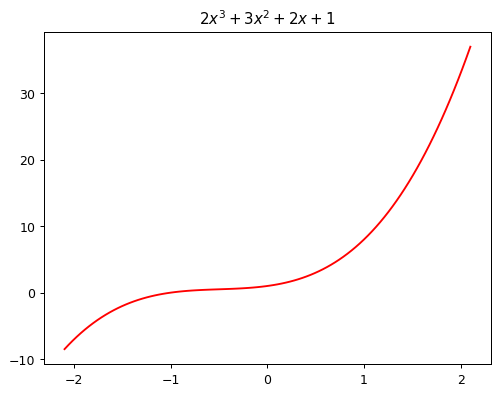

In [2]:
def f(x): return 2*x**3 + 3*x**2 + 2*x + 1

plot_function(f, "$2x^3 + 3x^2 + 2x + 1$")

In [3]:
def quad(a, b, c, d, x): return a*x**3 + b*x**2 + c*x + d

In [4]:
def mk_quad(a, b, c, d): return partial(quad, a, b, c, d)

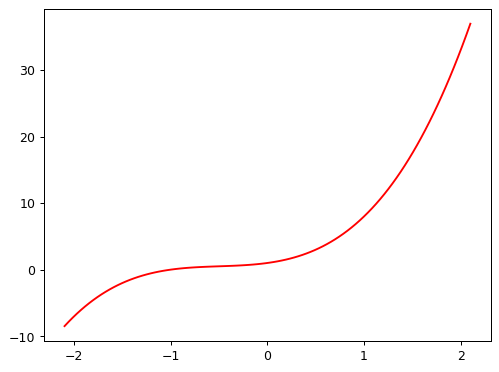

In [5]:
f2 = mk_quad(2, 3, 2, 1)
plot_function(f2)

In [6]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [7]:
x = np.array([10.0, 20.0, 30.0])
print(noise(x, 1.0))  

[-0.19680537 -1.37874228 -0.33790294]


In [8]:
np.random.seed(420)

x = torch.linspace(-2, 2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 1.5)

/var/folders/n9/_4t579m9103_sbbvsc8v7_z80000gn/T/ipykernel_9011/1958766108.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  def add_noise(x, mult, add): return x * (1+noise(x,mult)) + noise(x,add)


In [9]:
x[:5],y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[-5.6701],
         [-5.0934],
         [-4.9574],
         [-1.9578],
         [ 0.1368]], dtype=torch.float64))

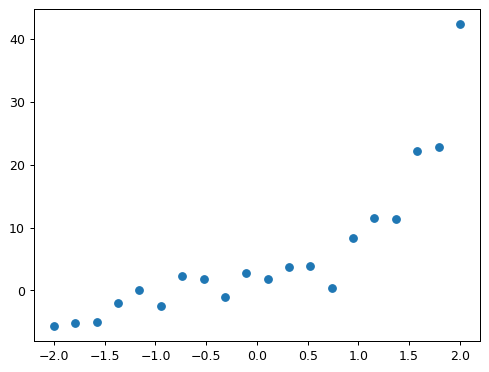

In [10]:
plt.scatter(x,y);

In [11]:
@interact(a=1.1, b=1.1, c=1.1, d=1.1)
def plot_quad(a, b, c, d):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c, d), ylim=(-3,13))

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [12]:
def mae(preds, acts): return (torch.abs(preds-acts)).mean()

In [14]:
@interact(a=1.1, b=1.1, c=1.1, d=1.1)
def plot_quad(a, b, c, d):
    f = mk_quad(a,b,c, d)
    plt.scatter(x,y)
    loss = mae(f(x), y)
    plot_function(f, ylim=(-3,13), title=f"MAE: {loss:.2f}")

interactive(children=(FloatSlider(value=1.1, description='a', max=3.3000000000000003, min=-1.1), FloatSlider(v…

In [17]:
def quad_mae(params):
    f = mk_quad(*params)
    return mae(f(x), y)

In [19]:
quad_mae([1.1, 1.1, 1.1, 1.1])

tensor(4.2123, dtype=torch.float64)

In [21]:
abc = torch.tensor([1.1, 1.1, 1.1, 1.1])

In [22]:
abc.requires_grad_()

tensor([1.1000, 1.1000, 1.1000, 1.1000], requires_grad=True)

In [24]:
loss = quad_mae(abc)
loss

tensor(4.2123, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [25]:
loss.backward()

In [26]:
abc.grad

tensor([-2.0711, -0.1629, -0.7263, -0.3000])

In [27]:
with torch.no_grad():
    abc -= abc.grad*0.01
    loss = quad_mae(abc)
    
print(f'loss={loss:.2f}')

loss=4.16


In [30]:
for i in range(50):
    loss = quad_mae(abc)
    loss.backward()
    with torch.no_grad(): abc -= abc.grad*0.01
    print(f'step={i}; loss={loss:.2f}')

step=0; loss=2.95
step=1; loss=2.78
step=2; loss=2.65
step=3; loss=2.54
step=4; loss=2.50
step=5; loss=2.45
step=6; loss=2.38
step=7; loss=2.31
step=8; loss=2.23
step=9; loss=2.22
step=10; loss=2.27
step=11; loss=2.32
step=12; loss=2.39
step=13; loss=2.48
step=14; loss=2.64
step=15; loss=2.78
step=16; loss=2.88
step=17; loss=3.02
step=18; loss=3.16
step=19; loss=3.28
step=20; loss=3.39
step=21; loss=3.56
step=22; loss=3.69
step=23; loss=3.79
step=24; loss=3.85
step=25; loss=3.89
step=26; loss=3.90
step=27; loss=3.87
step=28; loss=3.83
step=29; loss=3.81
step=30; loss=3.76
step=31; loss=3.69
step=32; loss=3.61
step=33; loss=3.50
step=34; loss=3.36
step=35; loss=3.21
step=36; loss=3.03
step=37; loss=2.83
step=38; loss=2.62
step=39; loss=2.41
step=40; loss=2.21
step=41; loss=2.03
step=42; loss=1.97
step=43; loss=1.96
step=44; loss=2.05
step=45; loss=2.18
step=46; loss=2.33
step=47; loss=2.53
step=48; loss=2.71
step=49; loss=2.88


In [34]:
# was: [2, 3, 2, 1]
abc

tensor([2.6545, 2.1572, 1.8087, 0.7410], requires_grad=True)